# 분류 Classification
## 1. 분류와 군집의 차이 (Classification vs. Clustering)
- 공통점: 분류와 군집은 모두 데이터를 특정한 집단으로 나눈다

|이름|설명|구분|알고리즘|
|--|--|--|--|
|분류|소속 집단의 정보를 이미 알고 있는 상태에서 새로운 데이터를 비슷한 집단으로 묶는 방법|지도학습|K-NN|
|군집|소속 집단의 정보가 없는 상태에서 비슷한 집단으로 묶는 방법|비지도학습|K-Means|

## 2. 분류 예제

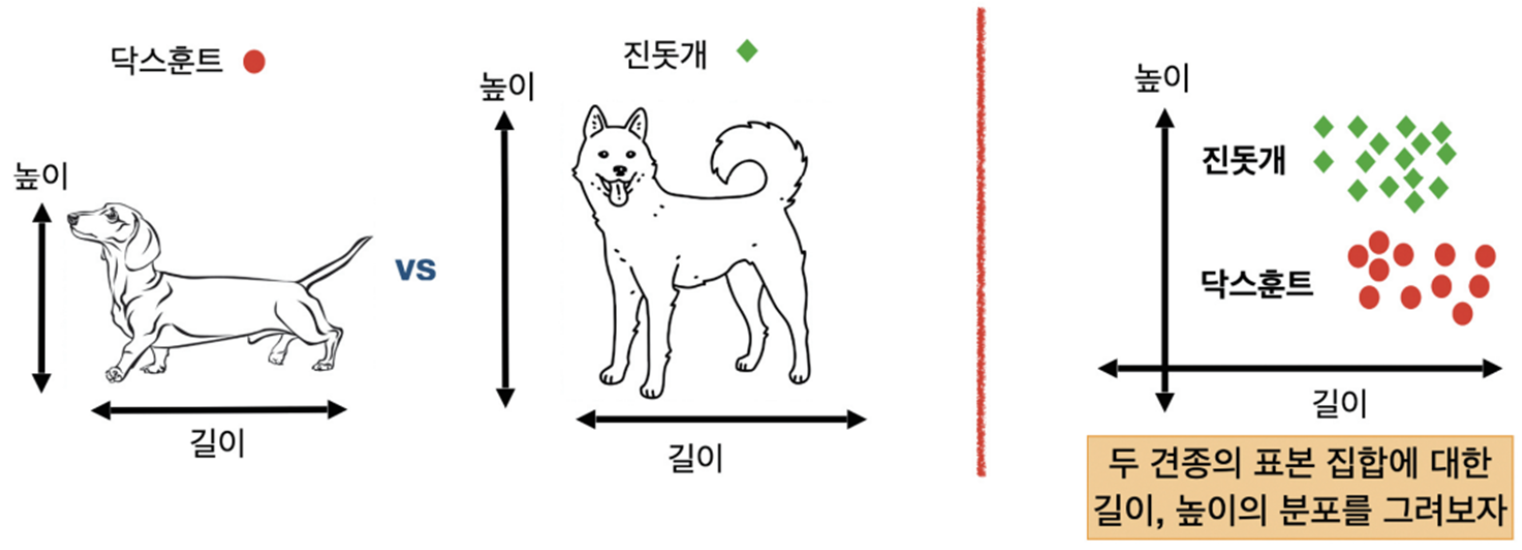

In [1]:
from IPython.display import Image, display
display(Image('image10_classification.png'))

> 산점도 그래프 위쪽에 분포한 녹색 점은 진돗개이고, 아래쪽에 붉은 점은 닥스훈트 종이다

### 1) K-NN 알고리즘
- `K-최근접 이웃` (K-Nearest Neighbor)
- 특정 공간에 분포하는 데이터에 대하여 k개의 가장 가까운 이웃을 살펴보고 다수결의 방식으로 데이터 레이블을 할당하는 분류 방식

### 2) K-NN의 특징

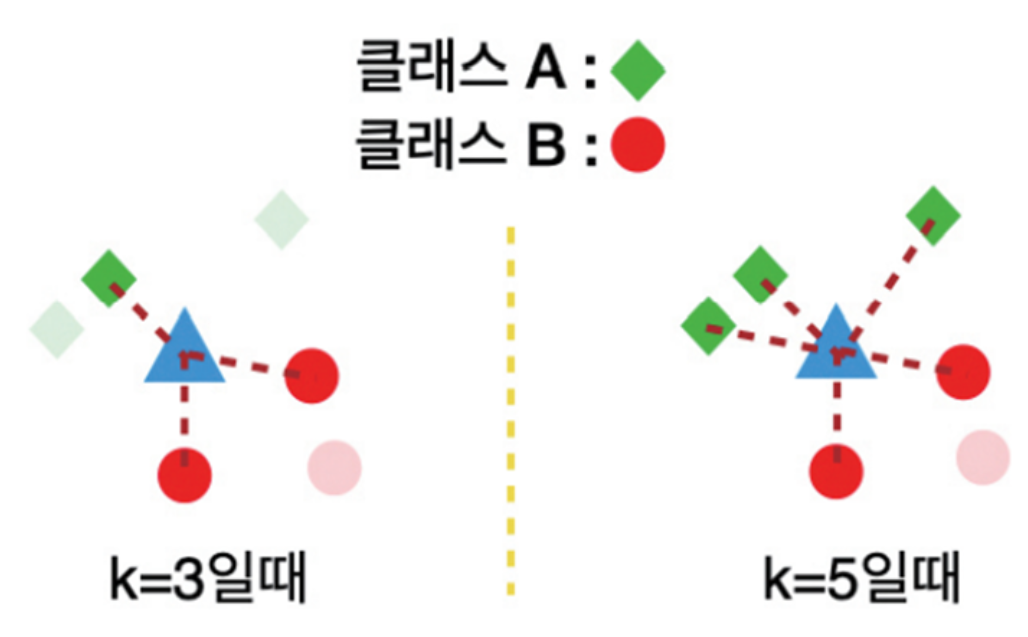

In [2]:
display(Image('image11_knn.png'))

- K-NN 알고리즘은 `k의 값`에 따라 결과가 달라진다
- 단순히 이웃의 수를 계산하는 것이 아니라 이웃과의 거리에 `가중치(wi)`를 부여하는 모델을 만들 수 있다
    - 새로 입력된 데이터와 가까운 위치의 점들은 더 낮은 가중치를 얻고, 먼 점들은 더 높은 가중치를 갖도록 한다
- 장점: 알고리즘이 매우 단순하고 직관적이며, 사전학습이나 특별한 준비 시간이 필요 없다
- 단점: 데이터의 수가 많다면 많은 메모 공간과 계산 시간이 필요하다

# 분류 분석 수행 (Classification)

## 1. 패키지 참조

In [7]:
import warnings
warnings.filterwarnings('ignore')

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# K-NN 분류를 위한 패키지
from sklearn.neighbors import KNeighborsClassifier

# 데이터 표준화 패키지
from sklearn.preprocessing import StandardScaler

# 분류 결과 판정을 위한 패키지
from sklearn import metrics

## 2. 데이터 가져오기

In [5]:
origin = read_excel('https://data.hossam.kr/G02/dogs.xlsx')
origin

,dog,length,height
0,d,55,30
1,d,57,31
2,d,64,36
3,d,63,30
4,d,58,33
5,d,49,25
6,d,54,37
7,d,61,34
8,j,56,52
9,j,47,52


## 3. 데이터 분포 확인

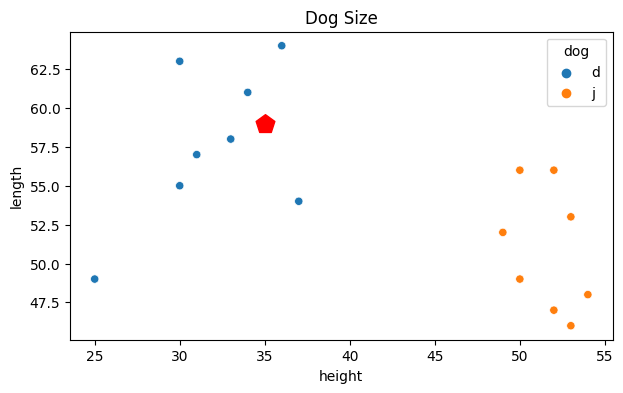

In [31]:
plt.figure(figsize=(7, 4))
sb.scatterplot(data=origin,
               x='height',
               y='length',
               hue='dog')
plt.title('Dog Size')
plt.xlabel('height')
plt.ylabel('length')

# 새로운 데이터 투입
newdata_height=[35]
newdata_length=[59]
plt.scatter(newdata_height,
            newdata_length,
            marker='p',
            s=200, # 사이즈
            c='r',
            label='origin') # 색
plt.show()
plt.close()

## 4. K-NN 분류 모델 구성
### 1) 종속 변수 라벨링

In [15]:
df1 = origin.copy()
df1['dog'] = df1['dog'].map({'d':0, 'j':1})
df1

,dog,length,height
0,0,55,30
1,0,57,31
2,0,64,36
3,0,63,30
4,0,58,33
5,0,49,25
6,0,54,37
7,0,61,34
8,1,56,52
9,1,47,52


### 2) 독립변수, 종속변수 분리

In [21]:
x = df1.drop('dog', axis=1)
y = df1.filter(['dog'])

### 3) 분류 모델 구성
- `k = 근접 이웃 수`

In [22]:
# 근접 이웃의 수를 3으로 설정
k = 3

# 모델 구성
knn = KNeighborsClassifier(n_neighbors=k)

# 모델 학습
fit = knn.fit(x, y)
fit

KNeighborsClassifier(n_neighbors=3)

### 4) 학습 결과 확인

In [23]:
y_pred = knn.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
df2 = df1.copy()
df2['predict_result'] = y_pred
df2

,dog,length,height,predict_result
0,0,55,30,0
1,0,57,31,0
2,0,64,36,0
3,0,63,30,0
4,0,58,33,0
5,0,49,25,0
6,0,54,37,0
7,0,61,34,0
8,1,56,52,1
9,1,47,52,1


### 5) 새로운 데이터 투입

In [26]:
# sklearn에 배열 데이터를 전달할 경우 2차원으로 구성해야 한다
newdata_length = [59]
newdata_height = [35]
new_data = [[newdata_length[0], newdata_height[0]]]

dog_classes = {0:'닥스훈트', 1:'진돗개'}
new_pred = knn.predict(new_data)

print('데이터: ', new_data, '예측: ', dog_classes[new_pred[0]])


데이터:  [[59, 35]] 예측:  닥스훈트


### 6) K-NN에서 이웃한 데이터 얻기
- `.kneighbors(데이터, k)`
    - k = 근접 이웃 수

In [28]:
k = 4
dist, indexes = knn.kneighbors(new_data, k)

# 거리
print('거리: ', dist)
# 인덱스
print('인덱스: ', indexes)


거리:  [[2.23606798 2.23606798 4.47213595 5.09901951]]
인덱스:  [[7 4 1 2]]


### 7) 이웃의 실 데이터 확인

In [29]:
neighbor_data1 = origin.values[indexes]
neighbor_data1

array([[['d', 61, 34],
        ['d', 58, 33],
        ['d', 57, 31],
        ['d', 64, 36]]], dtype=object)

### 8) 분류 결과 시각화

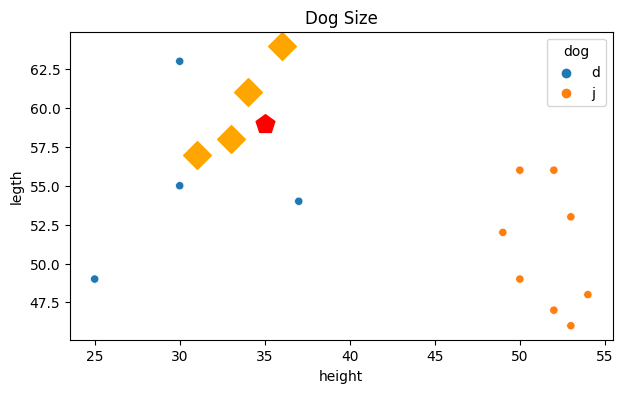

In [35]:
plt.figure(figsize=(7, 4))
sb.scatterplot(data=origin,
               x='height',
               y='length',
               hue='dog')
plt.title('Dog Size')
plt.xlabel('height')
plt.ylabel('legth')

# 새로운 데이터 투입
newdata_height = [35]
newdata_length = [59]
plt.scatter(newdata_height,
            newdata_length,
            marker='p',
            s=200,
            c='r',
            label='new_data')

# 근접 이웃 표시
for i, v in enumerate(neighbor_data1[0]):
    plt.scatter(v[2], 
                v[1],
                marker='D',
                s=200,
                c='orange',
                label='neighbor_data1')

## 5. 데이터 표준화 적용
### 1) 독립 변수에 대한 표준화

In [33]:
scaler = StandardScaler()
std_x = scaler.fit_transform(x)
std_x

array([[ 0.13882344, -1.15746348],
       [ 0.50901929, -1.05947716],
       [ 1.80470477, -0.56954552],
       [ 1.61960685, -1.15746348],
       [ 0.69411722, -0.8635045 ],
       [-0.97176411, -1.64739511],
       [-0.04627448, -0.4715592 ],
       [ 1.249411  , -0.76551818],
       [ 0.32392137,  0.9982357 ],
       [-1.34195996,  0.9982357 ],
       [ 0.32392137,  0.80226305],
       [-1.52705788,  1.09622203],
       [-0.97176411,  0.80226305],
       [-0.23137241,  1.09622203],
       [-0.41647033,  0.70427672],
       [-1.15686203,  1.19420835]])

### 2) 새로운 분류 대상에 대한 표준화

In [34]:
std_new_data = scaler.transform(new_data)
std_new_data

array([[ 0.87921515, -0.66753185]])

### 3) K-NN 분류기 생성

In [37]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(std_x, y)
y_pred = knn.predict(std_x)
print('측정치: ', y.values.flatten())
print('모델 분류결과: ', y_pred)

측정치:  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
모델 분류결과:  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


### 4) 새로운 분류 대상 투입

In [40]:
# 새로운 데이터에 대한 분류 결과
new_data_pred = knn.predict(std_new_data)
print('데이터: ', new_data_pred, '예측: ', dog_classes[new_data_pred[0]])

# 근접한 이웃의 거리와 인덱스
dist, indexes = knn.kneighbors(std_new_data, k)
print('거리: ', dist, '인덱스: ', indexes)

데이터:  [0] 예측:  닥스훈트
거리:  [[0.26956729 0.38294424 0.53913458 0.88781354 0.88781354]] 인덱스:  [[4 7 1 0 3]]


### 5) 표준화 적용 결과와 분류 결과 시각화

In [41]:
# 표준화 결과에 대한 임시 데이터프레임 생성
df3 = DataFrame(std_x, columns = x.columns)
df3['dog'] = y
df3

,length,height,dog
0,0.138823,-1.157463,0
1,0.509019,-1.059477,0
2,1.804705,-0.569546,0
3,1.619607,-1.157463,0
4,0.694117,-0.863505,0
5,-0.971764,-1.647395,0
6,-0.046274,-0.471559,0
7,1.249411,-0.765518,0
8,0.323921,0.998236,1
9,-1.341960,0.998236,1


In [42]:
neighbor_data2 = df3.values[indexes]
neighbor_data2

array([[[ 0.69411722, -0.8635045 ,  0.        ],
        [ 1.249411  , -0.76551818,  0.        ],
        [ 0.50901929, -1.05947716,  0.        ],
        [ 0.13882344, -1.15746348,  0.        ],
        [ 1.61960685, -1.15746348,  0.        ]]])

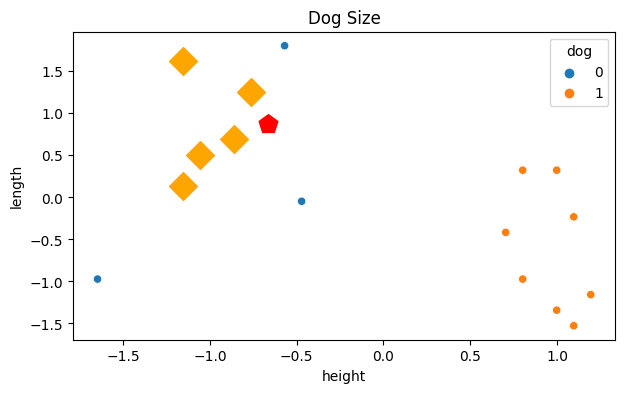

In [43]:
# 시각화
plt.figure(figsize=(7,4))
sb.scatterplot(data=df3,
               x='height',
               y='length',
               hue='dog')
plt.title('Dog Size')
plt.xlabel('height')
plt.ylabel('length')

# 새로운 데이터 튕ㅂ
plt.scatter(std_new_data[0][1], 
            std_new_data[0][0],
            marker='p',
            s=200,
            c='r')

# 근접 이웃 표시
for i, v in enumerate(neighbor_data2[0]):
    plt.scatter(v[1], v[0],
                marker='D',
                s=200,
                c='orange',
                label='neighbor_data2')
plt.show()
plt.close()